# Using Tabula Sapiens as a reference for annotating new datasets
This notebook allows you to annotate your data with a number of annotation methods using the Tabula Sapiens dataset as the reference. 

Integration Methods Provided:
- scVI
- bbKNN
- scanorama

Annotation Methods:
- KNN on integrated spaces
- scANVI
- onClass
- SVM
- RandomForest

To use the notebook, simply connect to your Google Drive account, set the necessary arguments, select your methods, and run all the code blocks!

**User action is only required in Step 2 and Step 3.**

Last edited: 5/13/2021

# Step 1: Setup Environment 
No user input required here.

In [2]:
import sys
import os

# Download annoation code
!wget -O annotation.py -q https://www.dropbox.com/s/id8sallwrunjc5c/annotation.py?dl=1
    
import anndata
import numpy as np
import scanpy as sc
import scvi

# Step 2: Load your data (User Action Required)


In [ ]:
query_adata = anndata.read('/path/to/your/anndata')

In [ ]:
query_adata

AnnData object with n_obs × n_vars = 75071 × 23681
    obs: 'method', 'donor', 'cell_ontology_type', 'donor_method', 'cell_ontology_id'

## Check that query_adata.X contains raw_counts

In [ ]:
from annotation import _check_nonnegative_integers

assert _check_nonnegative_integers(query_adata.X) == True, 'Make sure query_adata.X contains raw_counts'

# Step 3: Setting Up Annotation Parameters (User Action Required)

Here is where you set the parameters for the automated annotation.

Arguments:
- **tissue:** Tabula Sapiens tissue to annotate your data with. Available tissues: ["Bladder", "Blood", "Bone_Marrow", "Kidney", "Large_Intestine", "Lung","Lymph_Node", "Pancreas", "Small_Intestine", "Spleen", "Thymus","Trachea", "Vasculature"]
- **save_location:** location to save results to. By default will save to a folder named `annotation_results`. It is highly recommended you provide a Google Drive folder here.
- **query_batch_key:** key in `query_adata.obs` for batch correction. Set to None for no batch correction. 
- **methods:** these are the methods to run. By default, will run all methods.
- **training_mode** can be `online` or `offline`. If `offline` will train scVI and scANVI models from scratch. If `online`, will use pretrained models.

Lesser used parameters
- **query_labels_key**: scANVI has the option to use labeled cells in the query dataset during training. To use some prelabeled cells from the query dataset, set `query_labels_key` to the corresponding key in `query_adata.obs`
- **unknown_celltype_label**: If `query_labels_key` is not None, will treat everything not labeled `unknown_celltype_label` as a labeled cell

In [ ]:
""" 
tissue options: 
["Bladder", "Blood", "Bone_Marrow", "Kidney", "Large_Intestine", "Lung",
 "Lymph_Node", "Pancreas", "Small_Intestine", "Spleen", "Thymus",
 "Trachea", "Vasculature"]
"""
tissue = 'Lung'
save_folder = './'
query_batch_key = 'method'
methods = ['bbknn','scvi', 'scanvi', 'svm', 'rf', 'onclass', 'scanorama']
training_mode='online'

# Lesser used parameters
query_labels_key=None
unknown_celltype_label='unknown'

# Step 4: Downloading Reference Data and Pretrained Models
No more user input required! Just run all the following code blocks.

In [ ]:
# Here we download the necessary data:
if tissue == 'Bladder':
  refdata_url = 'https://ndownloader.figshare.com/files/27388874'
  pretrained_url='https://www.dropbox.com/s/rb89y577l6vs2mm/Bladder.tar.gz?dl=1'
elif tissue == 'Blood':
  refdata_url = 'https://ndownloader.figshare.com/files/27388853'
  pretrained_url = 'https://www.dropbox.com/s/kyh9nv202n0db65/Blood.tar.gz?dl=1'
elif tissue == 'Bone_Marrow':
  refdata_url = 'https://ndownloader.figshare.com/files/27388841'
  pretrained_url = 'https://www.dropbox.com/s/a3r4ddg7o7kua7z/Bone_Marrow.tar.gz?dl=1'
elif tissue == 'Kidney':
  refdata_url = 'https://ndownloader.figshare.com/files/27388838'
  pretrained_url = 'https://www.dropbox.com/s/k41r1a346z0tuip/Kidney.tar.gz?dl=1'
elif tissue == 'Large_Intestine':
  refdata_url = 'https://ndownloader.figshare.com/files/27388835'
  pretrained_url = 'https://www.dropbox.com/s/jwvpk727hd54byd/Large_Intestine.tar.gz?dl=1'
elif tissue == 'Lung':
  refdata_url = 'https://ndownloader.figshare.com/files/27388832'
  pretrained_url = 'https://www.dropbox.com/s/e4al4ia9hm9qtcg/Lung.tar.gz?dl=1'
elif tissue == 'Lymph_Node':
  refdata_url = 'https://ndownloader.figshare.com/files/27388715'
  pretrained_url = 'https://www.dropbox.com/s/mbejy9tcbx9e1yv/Lymph_Node.tar.gz?dl=1'
elif tissue == 'Pancreas':
  refdata_url = 'https://ndownloader.figshare.com/files/27388613'
  pretrained_url = 'https://www.dropbox.com/s/r3klvr22m6kq143/Pancreas.tar.gz?dl=1'
elif tissue == 'Small_Intestine':
  refdata_url = 'https://ndownloader.figshare.com/files/27388559'
  pretrained_url = 'https://www.dropbox.com/s/7eiv2mke70jinzc/Small_Intestine.tar.gz?dl=1'
elif tissue == 'Spleen':
  refdata_url = 'https://ndownloader.figshare.com/files/27388544'
  pretrained_url = 'https://www.dropbox.com/s/6j3iwahsjnb8rb3/Spleen.tar.gz?dl=1'
elif tissue == 'Thymus':
  refdata_url = 'https://ndownloader.figshare.com/files/27388505'
  pretrained_url='https://www.dropbox.com/s/9k0mneu2wvpiudz/Thymus.tar.gz?dl=1'
elif tissue == 'Trachea':
  refdata_url = 'https://ndownloader.figshare.com/files/27388460'
  pretrained_url = 'https://www.dropbox.com/s/57tthfgkl8jtxk6/Trachea.tar.gz?dl=1'
elif tissue == 'Vasculature':
  refdata_url = 'https://ndownloader.figshare.com/files/27388451'
  pretrained_url='https://www.dropbox.com/s/1wt3r871kxjas5o/Vasculature.tar.gz?dl=1'

# Download reference dataset
output_fn = 'TS_{}.h5ad'.format(tissue)
!wget -O $output_fn $refdata_url

# Download pretrained scVI and scANVI models.
output_fn = '{}.tar.gz'.format(tissue)
!wget -O $output_fn $pretrained_url
!tar -xvzf $output_fn

# Download onclass files
!wget -O cl.obo -q https://www.dropbox.com/s/hodp0etapzrd8ak/cl.obo?dl=1 
!wget -O cl.ontology -q https://www.dropbox.com/s/nes0zprzfbwbgj5/cl.ontology?dl=1
!wget -O cl.ontology.nlp.emb https://www.dropbox.com/s/y9x9yt2pi7s0d1n/cl.ontology.nlp.emb?dl=1

--2021-05-25 16:09:11--  https://ndownloader.figshare.com/files/27388832
Resolving ndownloader.figshare.com (ndownloader.figshare.com)... 18.202.93.19, 3.248.64.20, 34.249.85.89, ...
Connecting to ndownloader.figshare.com (ndownloader.figshare.com)|18.202.93.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2673660872 (2.5G) [application/octet-stream]
Saving to: ‘TS_Lung.h5ad’

TS_Lung.h5ad        100%[===================>]   2.49G  20.3MB/s    in 2m 23s  

2021-05-25 16:11:35 (17.8 MB/s) - ‘TS_Lung.h5ad’ saved [2673660872/2673660872]

--2021-05-25 16:11:35--  https://www.dropbox.com/s/e4al4ia9hm9qtcg/Lung.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/e4al4ia9hm9qtcg/Lung.tar.gz [following]
--2021-05-25 16:11:36--  https://www.dropbox.com/s/dl/e4al4ia

## Setup the reference dataset

In [ ]:
# read in the reference dataset
ref_adata_path = 'TS_{}.h5ad'.format(tissue)
ref_adata = anndata.read(ref_adata_path)

In [ ]:
# Here we filter out the cells that were not manually annotated
# This way we only train on expert annotated data
ref_adata = ref_adata[ref_adata.obs["Manually Annotated"] == "True"].copy()

# We wish to correct for batch effects from donor and method
# So we make a new batch key that will be passed to the methods
ref_adata.obs['donor_method'] = ref_adata.obs['Donor'].astype(str) + ref_adata.obs['Method'].astype(str)

# The annotation pipeline expects raw counts in the the X field
ref_adata.X = ref_adata.layers['raw_counts']

# Following parameters are specific to Tabula Sapiens dataset
ref_labels_key='Annotation'
ref_batch_key = 'donor_method'

## Check if we can use pretrained models


In [ ]:
from annotation import get_pretrained_model_genes, check_genes_is_subset
pretrained_scanvi_path = os.path.join(tissue, tissue + "_scanvi_model")
pretrained_scvi_path = os.path.join(tissue, tissue + "_scvi_model")

training_mode='online'
is_subset = False
if training_mode == 'online':
    pretrained_genes = get_pretrained_model_genes(pretrained_scvi_path)
    query_genes = query_adata.var_names.to_numpy().astype("str")
    is_subset = check_genes_is_subset(pretrained_genes, query_genes)

if is_subset and training_mode=='online':
    ref_adata = ref_adata[:, pretrained_genes]
else:
    training_mode = 'offline'


Not all reference genes are in query dataset. Retraining models.


In [ ]:
# here we setup the query dataset with the reference dataset
from annotation import process_query

adata = process_query(query_adata,
                      ref_adata,
                      tissue=tissue,
                      save_folder=save_folder,
                      query_batch_key=query_batch_key,
                      query_labels_key=query_labels_key,
                      unknown_celltype_label=unknown_celltype_label,
                      pretrained_scvi_path=pretrained_scvi_path,
                      ref_labels_key=ref_labels_key, 
                      ref_batch_key=ref_batch_key,
                      training_mode=training_mode,
                      ref_adata_path=ref_adata_path)

Sampling 100 per label


/content/annotation.py:387: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ref_adata.obs["_ref_subsample"][ref_subsample_idx] = True
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


INFO     Using batches from adata.obs["_batch_annotation"]                                   
INFO     Using labels from adata.obs["_labels_annotation"]                                   
INFO     Using data from adata.layers["scvi_counts"]                                         
INFO     Computing library size prior per batch                                              
INFO     Successfully registered anndata object containing 104505 cells, 4000 vars, 6        
         batches, 36 labels, and 0 proteins. Also registered 0 extra categorical covariates  
         and 0 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


... storing 'method' as categorical
... storing 'donor' as categorical
... storing 'cell_ontology_type' as categorical
... storing 'donor_method' as categorical
... storing 'cell_ontology_id' as categorical
... storing '_batch_annotation' as categorical
... storing '_dataset' as categorical
... storing 'final_annotation_cell_ontology_id' as categorical
... storing '_labels_annotation' as categorical
... storing 'Annotation' as categorical
... storing 'Manually Annotated' as categorical
... storing 'Donor' as categorical
... storing 'Method' as categorical
... storing 'Organ' as categorical
... storing 'Compartment' as categorical
... storing 'Anatomical Information' as categorical
... storing '_batch_annotation' as categorical
... storing '_dataset' as categorical
... storing 'final_annotation_cell_ontology_id' as categorical
... storing '_labels_annotation' as categorical


In [ ]:
adata

AnnData object with n_obs × n_vars = 104505 × 4000
    obs: 'donor_method', '_labels_annotation', '_batch_annotation', '_dataset', '_ref_subsample', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var'
    var: 'mean', 'std', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: '_training_mode', 'log1p', 'hvg', 'pca', '_scvi'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'scvi_counts'

# Step 5: Run Automated Cell Annotation Methods
No user action required. Takes about ~1 hour for a dataset for 100k cells. 

Your results will be saved to the folder you provided as **save_folder**.

There will be the following files:
- `annotated_query.h5ad` containing annotated query cells. The consensus annotations will be in `consensus_prediction`. There will also be a `consensus_percentage` field which is the percentage of methods that had the same prediction. 
- `annotated_query_plus_ref.h5ad` containing your query and the reference cells with predicted annotations. 
- `confusion_matrices.pdf` which contains the confusion matrices between the consensus_predictions and each individual method.
- `csv` files containing the metrics for each confusion matrix. 


In [ ]:
from annotation import annotate_data

annotate_data(adata,
              methods, 
              save_folder,
              pretrained_scvi_path=pretrained_scvi_path,
              pretrained_scanvi_path=pretrained_scanvi_path)

Integrating data with bbknn.
Classifying with knn on bbknn distances.


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:168: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  EfficiencyWarning)
/content/annotation.py:706: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs[result_key][query_idx] = knn_pred


Saved knn on bbknn results to adata.obs["knn_on_bbknn_pred"]


... storing 'knn_on_bbknn_pred' as categorical
... storing 'knn_on_bbknn_pred' as categorical


Running scVI.


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Training scvi offline.
Epoch 77/77: 100%|██████████| 77/77 [04:00<00:00,  3.13s/it, loss=778, v_num=1]
Classifying with knn on scVI latent space.
Training knn on scvi latent space. Using latent space in adata.obsm["X_scvi_offline"]


/content/annotation.py:910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs[result_key][query_idx] = knn_pred
... storing 'knn_on_scvi_offline_pred' as categorical
... storing 'knn_on_scvi_offline_pred' as categorical


Running scANVI.
INFO     Training for 77 epochs.                                                             


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 77/77: 100%|██████████| 77/77 [09:18<00:00,  7.25s/it, loss=934, v_num=1]


... storing 'scanvi_offline_pred' as categorical
... storing 'scanvi_offline_pred' as categorical


Classifying with SVM.


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/content/annotation.py:819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs[save_key][test_idx] = svm_pred
... storing 'svm_pred' as categorical
... storing 'svm_pred' as categorical


Classifying with random forest.
Training random forest classifier with 2837 cells


/content/annotation.py:730: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs[save_key][test_idx] = rf_pred
... storing 'rf_pred' as categorical
... storing 'rf_pred' as categorical


Running OnClass.
init OnClass
29434 4000 35 2353
Training cost after epoch 1: loss:18.195199 acc: 0.848 auc: 0.971 auprc: 0.747


/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


Training cost after epoch 2: loss:6.472742 acc: 0.861 auc: 0.986 auprc: 0.784


/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


Training cost after epoch 3: loss:7.418795 acc: 0.891 auc: 0.990 auprc: 0.848


/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


Training cost after epoch 4: loss:6.403556 acc: 0.913 auc: 0.992 auprc: 0.876


/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


Training cost after epoch 5: loss:6.138159 acc: 0.906 auc: 0.993 auprc: 0.891


/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


Training cost after epoch 6: loss:3.145052 acc: 0.911 auc: 0.995 auprc: 0.905


/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


Training cost after epoch 7: loss:2.841035 acc: 0.937 auc: 0.996 auprc: 0.934


/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


Training cost after epoch 8: loss:3.699444 acc: 0.923 auc: 0.996 auprc: 0.941


/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


Training cost after epoch 9: loss:3.115471 acc: 0.922 auc: 0.994 auprc: 0.916


/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


Training cost after epoch 10: loss:2.733034 acc: 0.925 auc: 0.996 auprc: 0.927


/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


Training cost after epoch 11: loss:3.285794 acc: 0.929 auc: 0.996 auprc: 0.932


/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


Training cost after epoch 12: loss:2.393076 acc: 0.940 auc: 0.996 auprc: 0.920


/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


Training cost after epoch 13: loss:3.487159 acc: 0.945 auc: 0.997 auprc: 0.937


/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


Training cost after epoch 14: loss:3.418227 acc: 0.940 auc: 0.997 auprc: 0.934


/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


Training cost after epoch 15: loss:1.947167 acc: 0.949 auc: 0.998 auprc: 0.943


/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


Training cost after epoch 16: loss:1.995989 acc: 0.927 auc: 0.996 auprc: 0.947


/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


Training cost after epoch 17: loss:3.059286 acc: 0.940 auc: 0.996 auprc: 0.953


/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


Training cost after epoch 18: loss:1.990470 acc: 0.950 auc: 0.997 auprc: 0.960


/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


Training cost after epoch 19: loss:1.754694 acc: 0.952 auc: 0.998 auprc: 0.962


/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


Training cost after epoch 20: loss:1.563520 acc: 0.955 auc: 0.998 auprc: 0.970


/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
Trying to set attribute `.obs` of view, copying.
/content/annotation.py:786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_adata.obs[save_key][i : i + shard_size] = pred_label_str
/content/annotation.py:786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_adata.obs[save_key][i : i + shard_size] = pred_label_str
/content/annotation.py:794: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation:

Running scanorama.
Found 4000 genes among all datasets
[[0.         0.41865767 0.74522293 0.25761952 0.27251995 0.6864704 ]
 [0.         0.         0.52866242 0.29192949 0.2668187  0.1584653 ]
 [0.         0.         0.         0.23248408 0.28620296 0.60350318]
 [0.         0.         0.         0.         0.6704675  0.19555744]
 [0.         0.         0.         0.         0.         0.42189282]
 [0.         0.         0.         0.         0.         0.        ]]
Processing datasets (0, 2)
Processing datasets (0, 5)
Processing datasets (3, 4)
Processing datasets (2, 5)
Processing datasets (1, 2)
Processing datasets (4, 5)
Processing datasets (0, 1)
Processing datasets (1, 3)
Processing datasets (2, 4)
Processing datasets (0, 4)
Processing datasets (1, 4)
Processing datasets (0, 3)
Processing datasets (2, 3)
Processing datasets (3, 5)
Processing datasets (1, 5)
Computing umap on scanorama
Classifying with knn on scanorama latent space.
Running knn on scanorama


/content/annotation.py:938: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs[result_key][query_idx] = knn_pred
... storing 'knn_on_scanorama_pred' as categorical
... storing 'knn_on_scanorama_pred' as categorical
... storing 'consensus_prediction' as categorical
... storing 'consensus_percentage' as categorical
... storing 'consensus_prediction' as categorical
... storing 'consensus_percentage' as categorical


# Step 6 Generate Statistics and Figures
No user action required.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

results_file = os.path.join(save_folder,'annotated_query_plus_ref.h5ad')
results = anndata.read(results_file)

Making confusion matrix for knn_on_bbknn_pred
Making confusion matrix for knn_on_scvi_offline_pred
Making confusion matrix for scanvi_offline_pred
Making confusion matrix for svm_pred
Making confusion matrix for rf_pred
Making confusion matrix for onclass_pred
Making confusion matrix for knn_on_scanorama_pred


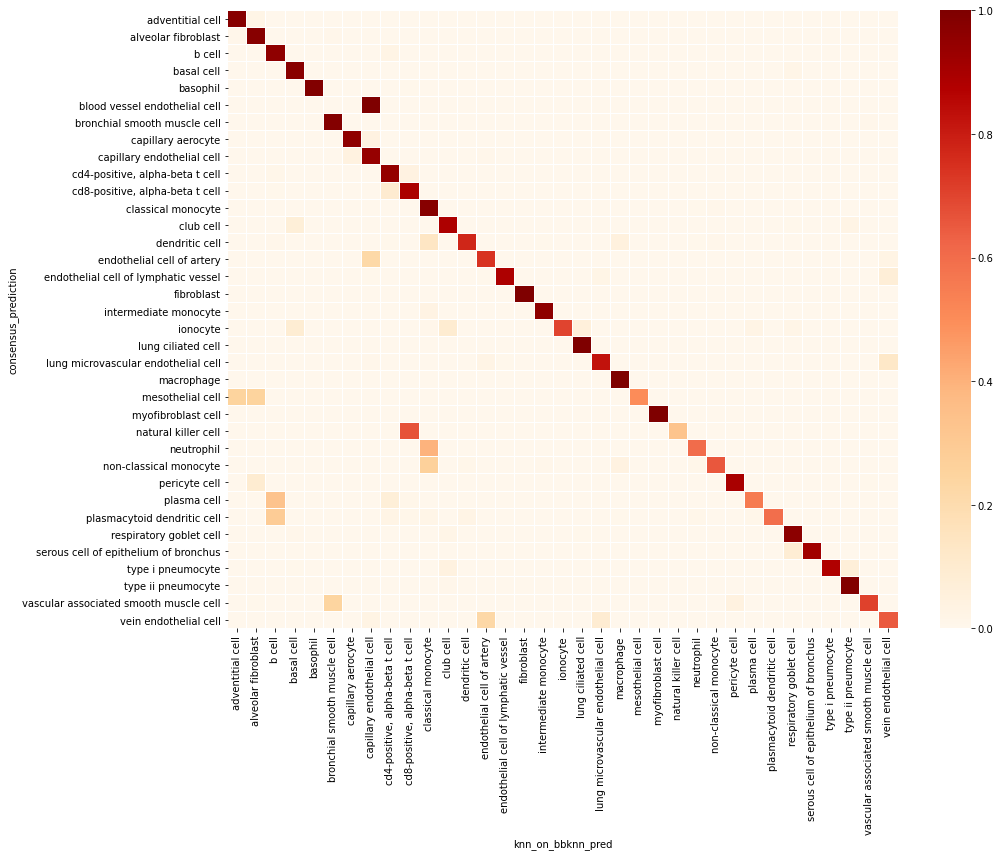

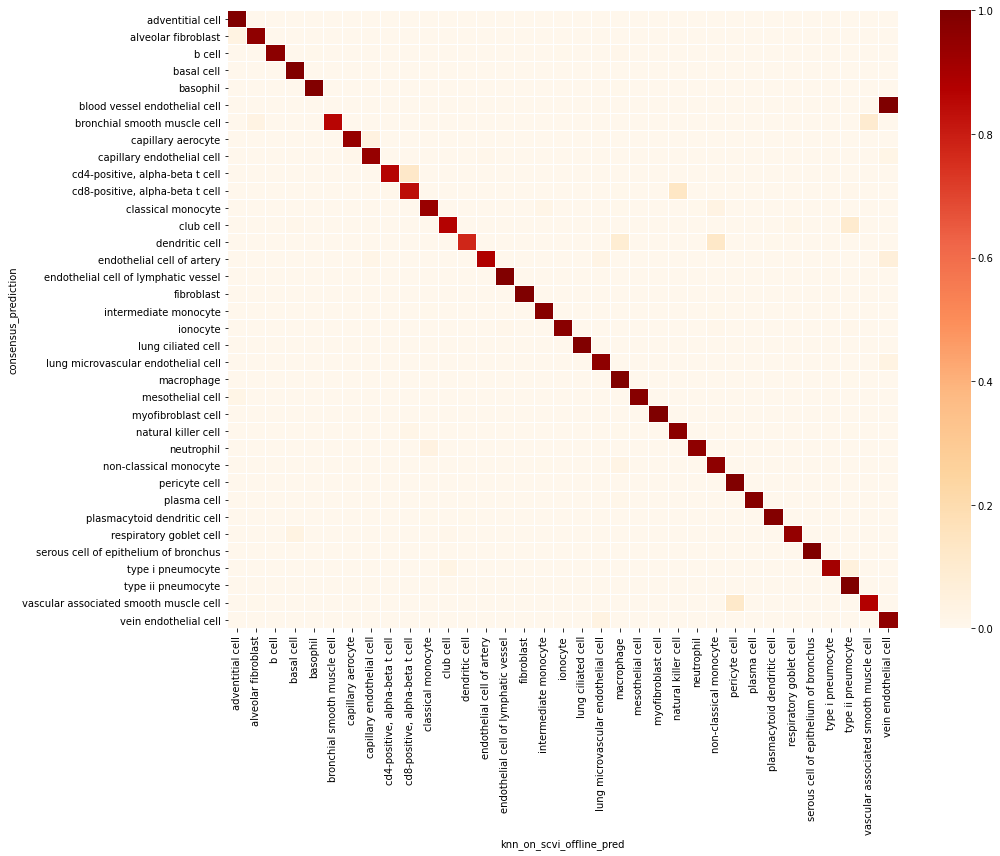

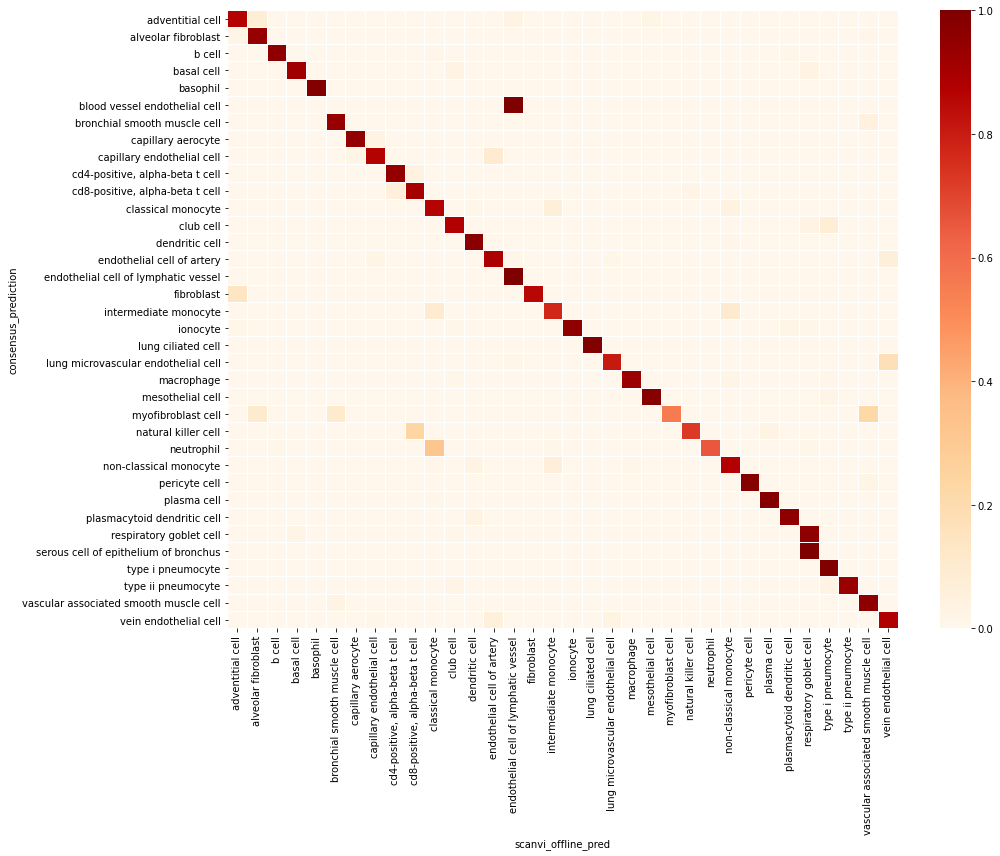

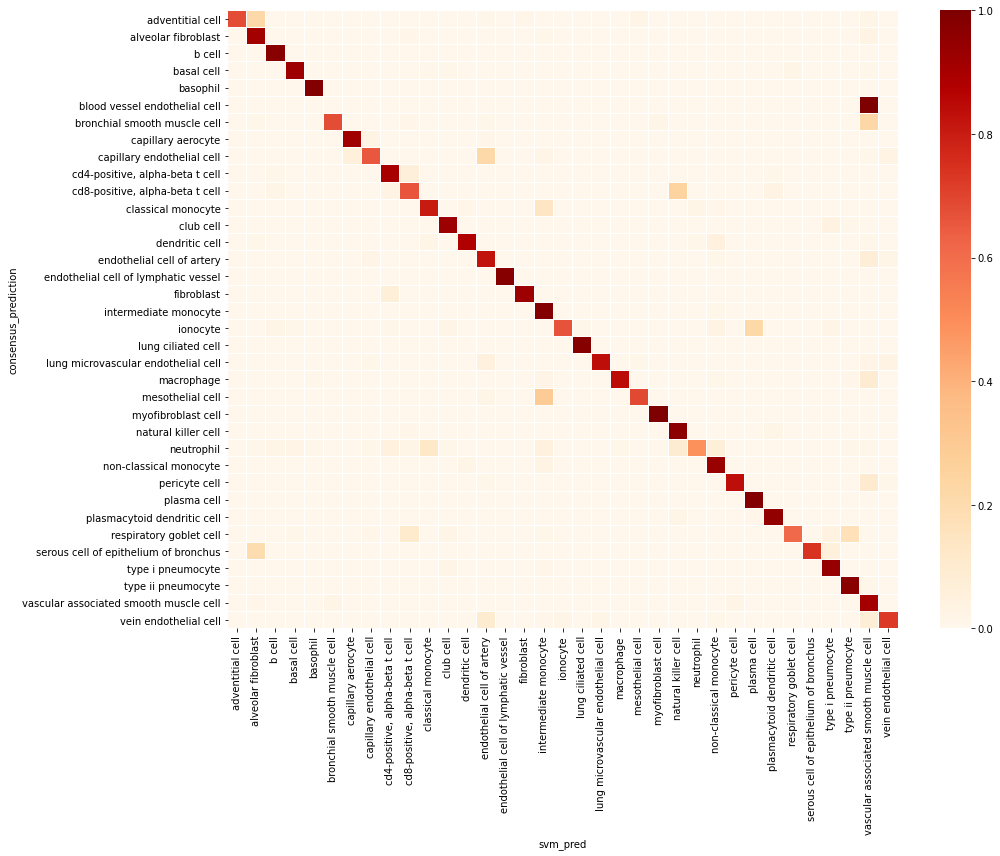

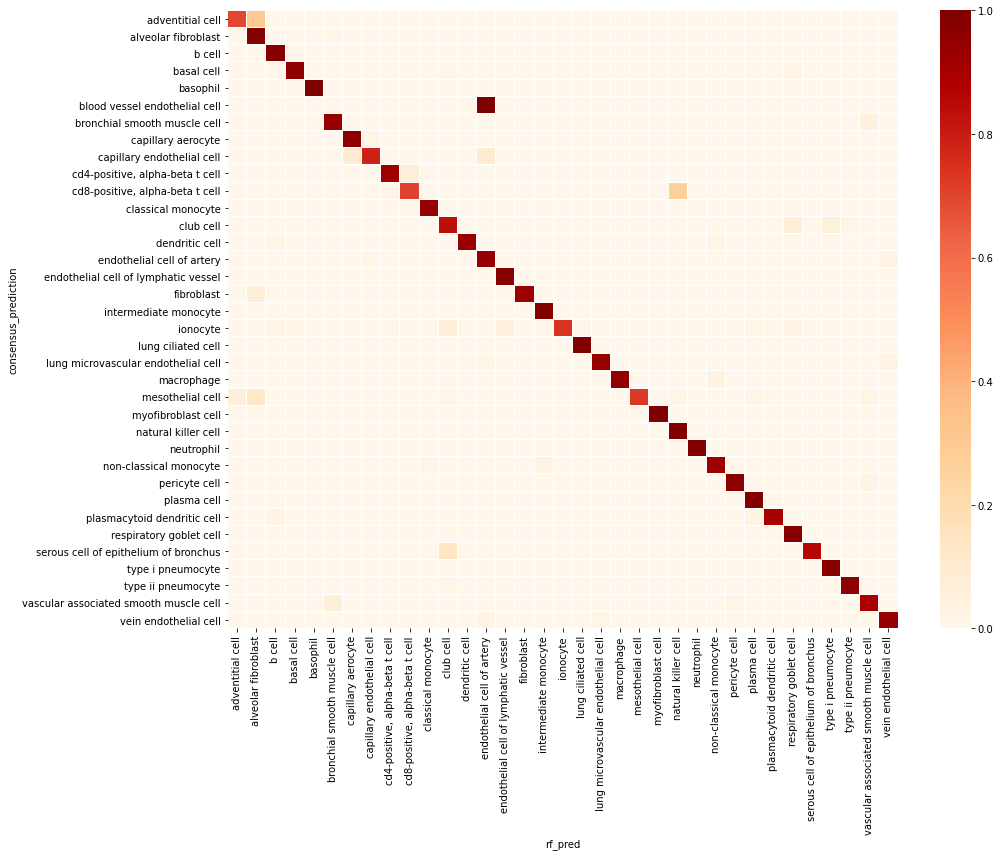

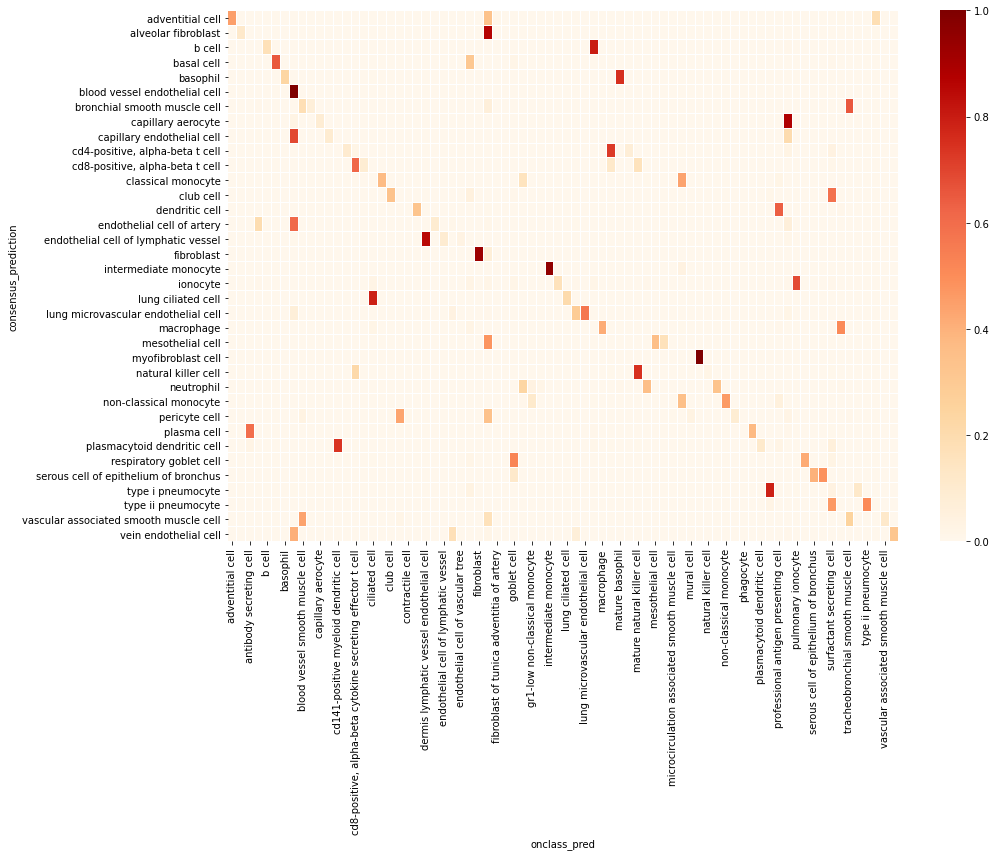

In [ ]:
from annotation import make_agreement_plots
all_prediction_keys = [
        "knn_on_bbknn_pred",
        "knn_on_scvi_online_pred",
        "knn_on_scvi_offline_pred",
        "scanvi_online_pred",
        "scanvi_offline_pred",
        "svm_pred",
        "rf_pred",
        "onclass_pred",
        "knn_on_scanorama_pred",
    ]

obs_keys = adata.obs.keys()
pred_keys = [key for key in obs_keys if key in all_prediction_keys]
make_agreement_plots(results, methods=pred_keys, save_folder=save_folder)

is_query = results.obs._dataset == "query"
methods = [x for x in results.obs.columns if x.endswith("_pred")]
labels = results.obs.consensus_prediction.astype(str)
labels[~is_query] = results[~is_query].obs._labels_annotation.astype(str)
celltypes = np.unique(labels)
latent_methods = results.obsm.keys()

### Distribution of consensus percentage
The more the algorithms agree with each other, the better the annotation has worked

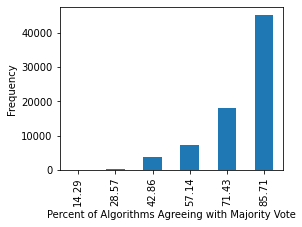

In [ ]:
agreement_counts = pd.DataFrame(
    np.unique(results[is_query].obs["consensus_percentage"], return_counts=True)
).T

agreement_counts.columns = ["Percent Agreement", "Count"]
agreement_counts.plot.bar(
    x="Percent Agreement", y="Count", legend=False, figsize=(4, 3)
)
plt.ylabel("Frequency")
plt.xlabel("Percent of Algorithms Agreeing with Majority Vote")
figpath = os.path.join(save_folder, "Concensus_Percentage_barplot.pdf")
plt.savefig(figpath, bbox_inches="tight")

### Per cell type agreement
Some cell types can be better predicted than others, and we can highlight the celltypes that are poorly predicted by looking at the per celltype agreement. The cell types are separated by the concensus predictions.

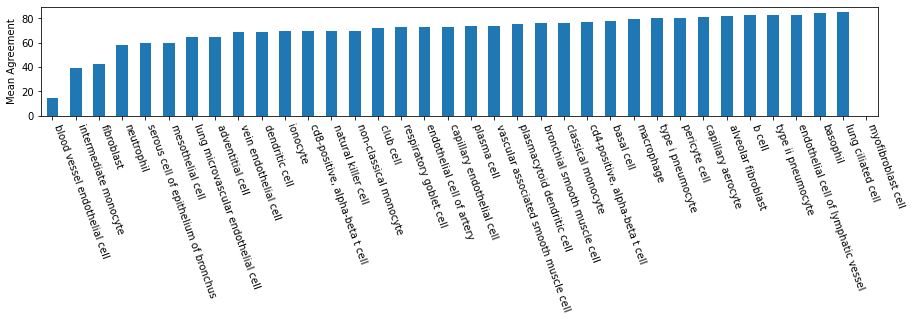

In [ ]:
mean_agreement = [
    np.mean(results[is_query & (labels == x)].obs["consensus_percentage"].astype(float))
    for x in celltypes
]
mean_agreement = pd.DataFrame([mean_agreement], index=["agreement"]).T
mean_agreement.index = celltypes

mean_agreement = mean_agreement.sort_values("agreement", ascending=True)
mean_agreement.plot.bar(y="agreement", figsize=(15, 2), legend=False)
plt.ylabel("Mean Agreement")
plt.xticks(rotation=290, ha="left")
figpath = os.path.join(save_folder, "percelltype_agreement_barplot.pdf")
plt.savefig(figpath, bbox_inches="tight")

### Cell type proportion plot

In [ ]:
prop = pd.DataFrame(index=celltypes, columns=["ref", "query"])
for x in celltypes:
    prop.loc[x, "query"] = np.sum(labels[is_query] == x)
    prop.loc[x, "ref"] = np.sum(labels[~is_query] == x)


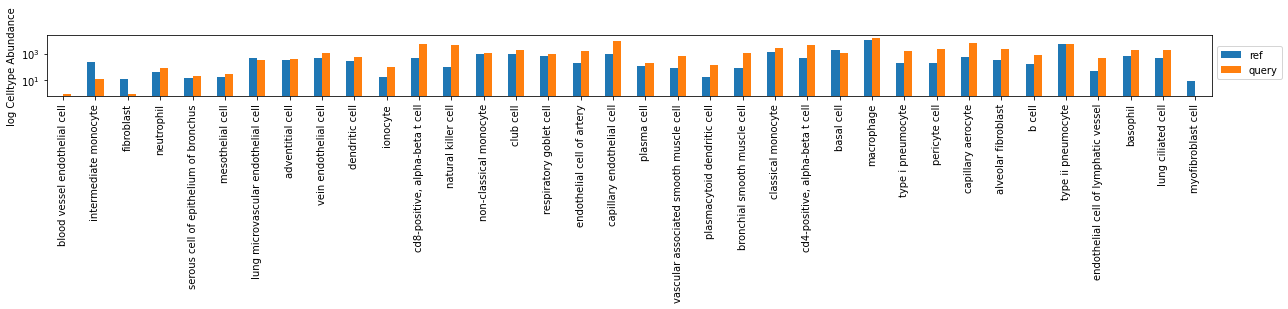

In [ ]:
prop.loc[mean_agreement.index].plot(kind='bar', figsize=(len(celltypes)*0.5,4),logy=True)
plt.legend(bbox_to_anchor=(1, 0.9))
plt.ylabel('log Celltype Abundance')
plt.tight_layout()
figpath = os.path.join(save_folder, 'celltype_prop_barplot.pdf')
plt.savefig(figpath, bbox_inches="tight")
plt.show()
plt.close()
